<a href="https://colab.research.google.com/github/Temitope-22/HelloWorld/blob/master/INST_414_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INST 414 Final Project

### Loading in data along with cleaning and preparing it for the coming models 

In [ ]:
# importing needed modules
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import torch
from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# needed bit of code from stackoverflow to import local files
from google.colab import files
uploaded = files.upload()

Saving cards.csv to cards (2).csv


In [ ]:
# reading in the data set 
hsdf = pd.read_csv('cards.csv', encoding='cp1252')
# removing unnecessary columns and examining it for cleaning in the next few cells 
del hsdf["rarity"]
del hsdf['collectible']
del hsdf['flavor']
del hsdf['race']
del hsdf['how_to_earn']
del hsdf['how_to_earn_golden']
del hsdf['targeting_arrow_text']
del hsdf['faction']
del hsdf['durability']

In [ ]:
hsdf.describe()

,cost,attack,health
count,2168.000000,1258.000000,1368.000000
mean,3.045203,3.600954,8.329678
std,2.749130,3.312866,13.825866
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000
50%,3.000000,3.000000,4.000000
75%,4.000000,5.000000,7.000000
max,50.000000,30.000000,200.000000


In [ ]:
hsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card_id      2819 non-null   object 
 1   playerClass  2816 non-null   object 
 2   type         2818 non-null   object 
 3   name         2818 non-null   object 
 4   set          2818 non-null   object 
 5   text         2386 non-null   object 
 6   cost         2168 non-null   float64
 7   attack       1258 non-null   float64
 8   health       1368 non-null   float64
dtypes: float64(3), object(6)
memory usage: 198.3+ KB


In [ ]:
hsdf = hsdf.interpolate().dropna()

In [ ]:
hsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382 entries, 3 to 2817
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card_id      2382 non-null   object 
 1   playerClass  2382 non-null   object 
 2   type         2382 non-null   object 
 3   name         2382 non-null   object 
 4   set          2382 non-null   object 
 5   text         2382 non-null   object 
 6   cost         2382 non-null   float64
 7   attack       2382 non-null   float64
 8   health       2382 non-null   float64
dtypes: float64(3), object(6)
memory usage: 186.1+ KB


In [ ]:
hsdf.isnull().sum()

card_id        0
playerClass    0
type           0
name           0
set            0
text           0
cost           0
attack         0
health         0
dtype: int64

In [ ]:
# removing column with that held to many categories
hs = hsdf
del hs['card_id']
del hs['name']
del hs['text']



In [ ]:
hs.set.unique()

array(['BRM', 'TGT', 'OG', 'CREDITS', 'GVG', 'TB', 'CORE', 'LOE',
       'HERO_SKINS', 'GANGS', 'EXPERT1', 'PROMO', 'NAXX', 'KARA',
       'MISSIONS', 'CHEAT', 'REWARD'], dtype=object)

In [ ]:
# reclassifying certain columns with to many categories for the model

hs['playerClass'] = hs.playerClass.map({'DRUID': 0, 'NEUTRAL': 1, 'WARRIOR': 2, 'WARLOCK': 3, 'PALADIN': 4, 'SHAMAN': 5,
       'HUNTER': 6, 'MAGE': 7, 'ROGUE': 8, 'PRIEST': 9, 'DREAM': 10, 'DEATHKNIGHT': 11})

hs['type'] = hs.type.map({'MINION': 0, 'ENCHANTMENT': 1, 'HERO': 2, 'HERO_POWER': 3, 'SPELL': 4, 'WEAPON': 5})

hs['set'] = hs.set.map({'BRM': 0, 'TGT': 1, 'OG': 2, 'CREDITS': 3, 'GVG': 4, 'TB': 5, 'CORE': 6, 'LOE': 7,
       'HERO_SKINS': 8, 'GANGS': 9, 'EXPERT1': 10, 'PROMO': 11, 'NAXX': 12, 'KARA': 13,
       'MISSIONS': 14, 'CHEAT': 15, 'REWARD': 16})


In [ ]:
hs.head(10)

,playerClass,type,set,cost,attack,health
3,1,0,1,6.00,6.0,3.000000
5,1,0,3,9.00,9.0,9.000000
6,1,1,2,7.25,7.8,29.500000
8,1,1,4,3.75,5.4,34.666667
9,1,3,5,2.00,4.2,19.333333
10,1,0,1,3.00,3.0,4.000000
11,1,1,6,1.50,3.4,4.000000
12,1,3,7,0.00,3.8,4.000000
13,2,3,8,2.00,4.2,4.000000
14,1,1,9,4.00,4.6,4.000000


# Logistic Regression

In [ ]:
# setting the variables
X = hs.drop(['type'], axis = 1)
y = hs['type']

#splitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:

LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1 3 4 5]
Intercept [ 1.18481156  0.55950584 -0.68347474  0.84246091 -1.90330356]
Coefficients [[-0.08032978 -0.04867393  0.93866758 -0.26715563 -0.80704743]
 [-0.1300833  -0.08858911  0.12820681  0.07290969  0.14466212]
 [-0.2449387  -0.21455232 -1.12353854  0.36239237  0.30052971]
 [ 0.20102284  0.18452421 -0.46840588  0.42525573  0.20885022]
 [ 0.25432894  0.16729115  0.52507004 -0.59340216  0.15300538]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.5828092243186582
              precision    recall  f1-score   support

           0       0.59      0.93      0.72       193
           1       0.00      0.00      0.00        78
           3       0.75      0.06      0.11        51
           4       0.58      0.65      0.61       146
           5       0.00      0.00      0.00         9

    accuracy                           0.58       477
   macro avg       0.38      0.33      0.29       477
weighted avg       0.50      0.58      0.49       477



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### From the results my classifier accurately predicted 58% of the target variable

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[180,   1,   0,  12,   0],
       [ 55,   0,   1,  22,   0],
       [ 15,   1,   3,  32,   0],
       [ 50,   1,   0,  95,   0],
       [  6,   0,   0,   3,   0]])

Text(0.5, 257.44, 'Predicted label')

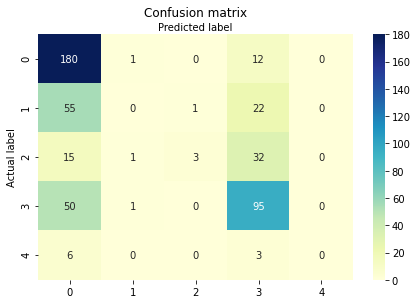

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree Classification

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [ ]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6477987421383647

### Using this Classification the prediction attained a 64% accuracy of the target variable
### The tree is plotted below:

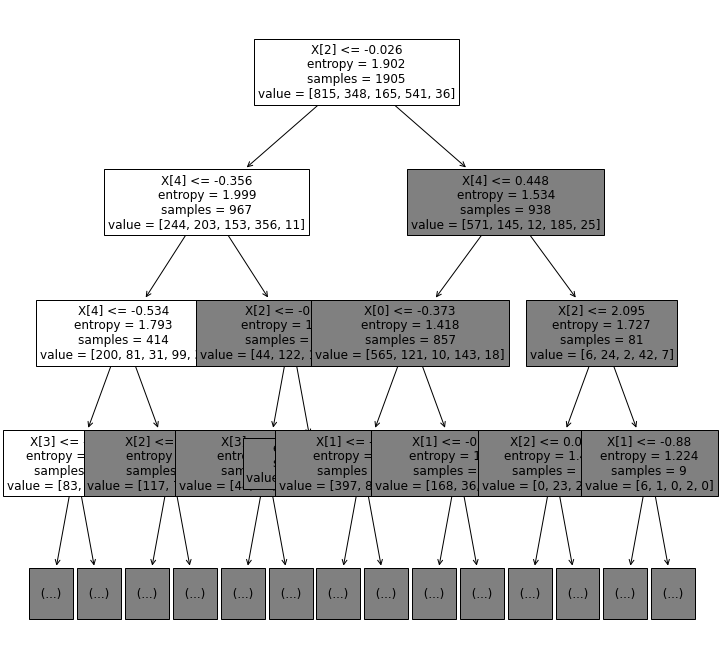

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

# XGBoost 

accuracy: 0.624738


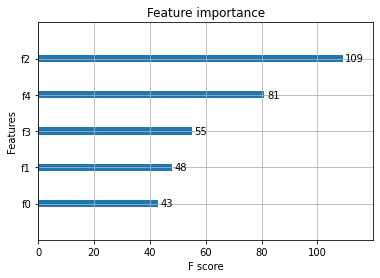

In [ ]:
# Creating XGBoost model
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

xg_cl.fit(X_train, y_train)

preds = xg_cl.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
xgb.plot_importance(xg_cl)
plt.show()

### Using the XGBoost classifier it was able to reach 62% accuracy on the target variable 
#### The graph below shows feature importance

# Keras

In [ ]:
# Constructing Keras model
model = Sequential()

model.add(Dense(128, input_shape=(5,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
model.add(Dense(4, activation="softmax"))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 11,241
Trainable params: 11,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.backend.clear_session()

In [ ]:
# Compiling my model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
 
# fitting model and determining accuracy 
model.fit(X_train,y_train,epochs=200)
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy:', accuracy)

Epoch 1/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 2/200
60/60 [==============================] - 0s 1ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 5/200
60/60 [==============================] - 0s 1ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 9/200
60/60 [==============================] - 0s 2ms/step - loss: 1.9943e-07 - accuracy: 0.4278
Epoch 10/200
60/60 [==============================] - 0s 2ms/step - loss:

### The Keras model ran 200 times to ultimately get an average accuracy of 42% for the target variable

# Pytorch

In [ ]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
# splitting the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= RANDOM_SEED)
# converting to Tensors
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([1905, 5]) torch.Size([1905])
torch.Size([477, 5]) torch.Size([477])


In [ ]:
# Building the Neural Network for my data
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 100)
    self.fc2 = nn.Linear(100, 600)
    self.fc3 = nn.Linear(600, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))
net = Net(X_train.shape[1])



In [ ]:
# Training Neural Network
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
net = net.to(device)
criterion = criterion.to(device)

def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(1000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train) # for some reason I am getting an error with my code, target seems to not be the same size of input. disabling code from working
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()


epoch 0
Train set - loss: 0.208, accuracy: 0.293
Test  set - loss: 0.289, accuracy: 0.258

epoch 100
Train set - loss: -75.13, accuracy: 0.212
Test  set - loss: -79.393, accuracy: 0.201

epoch 200
Train set - loss: -82.55, accuracy: 0.266
Test  set - loss: -83.147, accuracy: 0.27

epoch 300
Train set - loss: -85.689, accuracy: 0.302
Test  set - loss: -91.179, accuracy: 0.31

epoch 400
Train set - loss: -88.43, accuracy: 0.319
Test  set - loss: -92.396, accuracy: 0.331

epoch 500
Train set - loss: -89.431, accuracy: 0.327
Test  set - loss: -92.187, accuracy: 0.331

epoch 600
Train set - loss: -89.447, accuracy: 0.331
Test  set - loss: -91.942, accuracy: 0.333

epoch 700
Train set - loss: -89.122, accuracy: 0.347
Test  set - loss: -91.67, accuracy: 0.344

epoch 800
Train set - loss: -91.198, accuracy: 0.33
Test  set - loss: -91.585, accuracy: 0.331

epoch 900
Train set - loss: -90.627, accuracy: 0.365
Test  set - loss: -90.976, accuracy: 0.35



### The code for this portion was aided from this site: https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/ and the Accuracy of the resulting network fluctuates around 32%.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
